In [1]:
import tensorflow as tf # This tells Colab that we are using TensorFlow

from tensorflow import keras # This is the main TensorFlow library
from tensorflow.keras import layers # We are building a Neural Network with several hidden layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report


print("Current TensorFlow version is", tf.__version__)

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns # for visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

Current TensorFlow version is 2.8.0


In [16]:
sppsc = pd.read_csv("https://raw.githubusercontent.com/manojmacha/macha_IT533/main/student/student-por.csv",delimiter=';')
sppsc.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [17]:
sppsc.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [18]:
sppsc.famsize.value_counts()

GT3    457
LE3    192
Name: famsize, dtype: int64

In [19]:
sppsc.guardian.value_counts()

mother    455
father    153
other      41
Name: guardian, dtype: int64

In [20]:
sppsc.Medu.value_counts()

2    186
4    175
1    143
3    139
0      6
Name: Medu, dtype: int64

In [21]:
sppsc.Mjob.value_counts()

other       258
services    136
at_home     135
teacher      72
health       48
Name: Mjob, dtype: int64

### Q1 is there a class attribute in your dataset, if not, what class attribute should be there? For What academic purpose would someone be interested in the class attribute?

### Yes there is a Class attribute in the dataset however there it is a continous attribute G3 which is the final grade of student in  Mathematics and Portuguese language, Which we have to convert into class attribute later. It is used to build the predictive model.

In [22]:
#Converting likely target attribute into class attribute
sppsc['G3'] = sppsc['G3'].apply(lambda x: 'poor' if x <11 else 'good')
sppsc['G3'].value_counts() 

good    452
poor    197
Name: G3, dtype: int64

In [23]:
sppsc.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,good
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,good
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,good
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,good
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,good


#List the Minimum, Maximum, Mean, Median, Mode, Q1, Q3, and Standard Deviation for the freetime and studytime attributes belonging to students who have internet at home AND students who don't have internet at home.  Which attribute has the smaller standard deviation?  Why does that matter, and what does it tell you about the academic opportunities of these two different populations?

In [24]:
print("For Student who has internet",sppsc[sppsc['internet']=='yes']['freetime'].describe(),'\n')
print("For Student who do not has internet",sppsc[sppsc['internet']=='no']['freetime'].describe())

For Student who has internet count    498.000000
mean       3.216867
std        1.021478
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64 

For Student who do not has internet count    151.000000
mean       3.059603
std        1.138606
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64


In [25]:
print("For Student who has internet",sppsc[sppsc['internet']=='yes']['studytime'].describe(),'\n')
print("For Student who do not has internet",sppsc[sppsc['internet']=='no']['studytime'].describe())

For Student who has internet count    498.000000
mean       1.947791
std        0.832734
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64 

For Student who do not has internet count    151.000000
mean       1.874172
std        0.818980
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64


### Standard deviation for studen who has internet is less compared to student who do not have internet for the column freetime. For Studytime the standard deviation is less for student who donot have internet than student who does have internet

In [26]:
sppsc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [27]:
#Converting all the object variables into number using label encoder from sklearn
from sklearn import preprocessing

labelencoder = preprocessing.LabelEncoder()
objcol = [i for i in sppsc.columns if sppsc[i].dtype=='object' ]
for i in objcol:
  sppsc[i] = labelencoder.fit_transform(sppsc[i])

sppsc.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,0
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,0
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,0
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,0
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,0


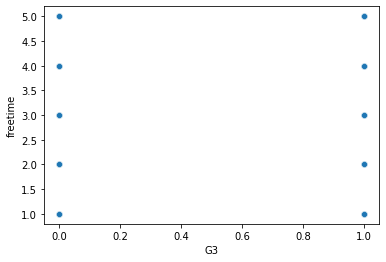

In [29]:
sns.scatterplot(sppsc['G3'],sppsc['freetime'])

Scaterplot from G3 and travel time is similar for both category in target variable G3

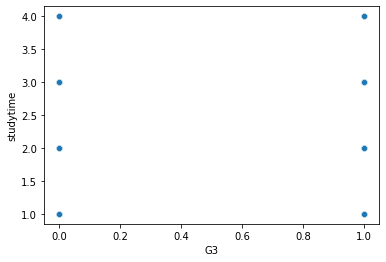

In [30]:
sns.scatterplot(sppsc['G3'],sppsc['studytime'])

Scaterplot from G3 and Study time is similar for both category in target variable G3

#Separate the sppscset into 25% training sppsc and 75% test sppsc.  Then prepare the training sppsc to run with a Neural Network and KNN

In [31]:
# Splitting into Training and Test Set
train_dataset = sppsc.sample(frac=0.25, random_state=0)
test_dataset = sppsc.drop(train_dataset.index)

# Splitting Features from Labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('G3')
test_labels = test_features.pop('G3')

In [32]:
# Encoding the output variable with pd.get_dummies
train_labels1 = pd.get_dummies(train_labels, columns=['G3'], prefix='', prefix_sep='')
test_labels1 = pd.get_dummies(test_labels, columns=['G3'], prefix='', prefix_sep='')

In [33]:
from tensorflow.keras.layers.experimental import preprocessing
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
normalizer.mean.numpy()

array([[ 0.3271605 ,  0.3703704 , 16.746914  ,  0.7283951 ,  0.26543212,
         0.8518518 ,  2.5       ,  2.2839506 ,  1.8580247 ,  2.191358  ,
         1.2407408 ,  0.82716054,  1.5617285 ,  1.9320986 ,  0.16049382,
         0.09876543,  0.59876543,  0.06790124,  0.47530866,  0.7901235 ,
         0.9135803 ,  0.771605  ,  0.4197531 ,  3.9444447 ,  3.1913583 ,
         3.08642   ,  1.5       ,  2.271605  ,  3.3765433 ,  2.8888888 ,
        11.530865  , 11.771606  ]], dtype=float32)

In [36]:
# define the Keras model
model = Sequential(normalizer)
model.add(Dense(32, input_dim=train_features.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 32)               65        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 5,379
Trainable params: 5,314
Non-trainable params: 65
_____________________________________________________

In [37]:
# compile the Keras model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [38]:
# fit the Keras model on the dataset
%%time
model.fit(train_features, train_labels1, epochs=100, batch_size=10)

Epoch 1/100
17/17 [==============================] - 3s 3ms/step - loss: 0.6501 - accuracy: 0.6481
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5000 - accuracy: 0.7346
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4286 - accuracy: 0.7654
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.3514 - accuracy: 0.8272
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2847 - accuracy: 0.8827
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2345 - accuracy: 0.9074
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1899 - accuracy: 0.9383
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1493 - accuracy: 0.9630
Epoch 9/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1146 - accuracy: 0.9753
Epoch 10/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0876 - accuracy: 0.9877
Epoch 11/

In [39]:
# evaluate the keras model
accuracy = model.evaluate(test_features, test_labels1)
print('Accuracy: %.2f' % (accuracy[1]*100))

16/16 [==============================] - 0s 3ms/step - loss: 1.3468 - accuracy: 0.8234
Accuracy: 82.34


              precision    recall  f1-score   support

           0       0.83      0.93      0.88       332
           1       0.79      0.60      0.68       155

    accuracy                           0.82       487
   macro avg       0.81      0.76      0.78       487
weighted avg       0.82      0.82      0.82       487



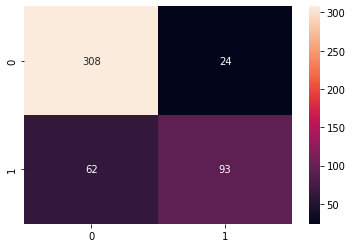

In [40]:
from sklearn.metrics import plot_confusion_matrix,classification_report, confusion_matrix
pred = model.predict(test_features)
sns.heatmap(confusion_matrix(np.argmax(np.array(test_labels1),axis=1),np.argmax(pred,axis=1)), annot=True, fmt='d')
print(classification_report(np.argmax(np.array(test_labels1),axis=1),np.argmax(pred,axis=1)))

### Naive Bayes

In [41]:
x_train = train_dataset.drop(['G3'],axis=1)
y_train = train_dataset[['G3']]
x_test = test_dataset.drop(['G3'],axis=1)
y_test = test_dataset[['G3']]

In [42]:
from sklearn.naive_bayes import GaussianNB
ins_naivebayes = GaussianNB()
ins_naivebayes

ins_naivebayes.fit(x_train,y_train)

GaussianNB()

In [43]:
from sklearn import metrics
ins_predictions = ins_naivebayes.predict(x_test)
metrics.accuracy_score(y_test, ins_predictions)

0.8459958932238193

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       332
           1       0.75      0.77      0.76       155

    accuracy                           0.85       487
   macro avg       0.82      0.83      0.82       487
weighted avg       0.85      0.85      0.85       487



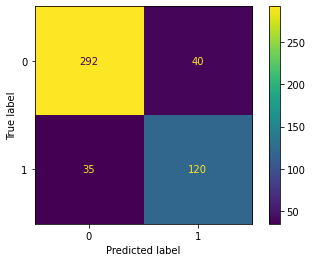

In [44]:
#printing confusion matrix and classification report

plot_confusion_matrix(ins_naivebayes,x_test,y_test)
print(classification_report(y_test, ins_predictions))

In [45]:
#the class attribute has able predicted better in  naive bayes with 85% accuracy than neural network algorithm with 82 % accuracy.

## Using the test data set you have just generated, remove the class attribute and run two of the clustering algorithms below.  Produce a  plot of your choice to identify clusters

###Clustering

In [46]:
clusterdata = test_dataset.drop(['G3'],axis=1)

In [47]:
from plotly.figure_factory import create_dendrogram
fig = create_dendrogram(clusterdata, labels=clusterdata.index)
fig.show()

DBSCAN(eps=0.05, min_samples=0.5)


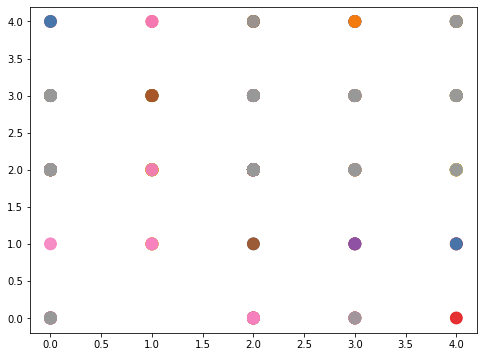

In [52]:
model_1 = DBSCAN(eps=0.05, min_samples=0.5).fit(clusterdata)
print(model_1) # model set-ups and parameters
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(clusterdata.Mjob,clusterdata.Fjob, c=model_1.labels_, s=140, alpha=0.9, cmap=plt.cm.Set1)

fig.show()

In [53]:
labels_1=model_1.labels_
labels_1
# Number of clusters in labels, ignoring noise points
n_clusters_ = len(set(labels_1)) - (1 if -1 in labels_1 else 0)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 487


### What clusters have you discovered?  Do they make sense?  What do they tell you about academic performance in these two groups?

### In Hierarchy cluster is showing 3 cluster which makes sense as it  tells there are 3 types of student groups which and for each group we can train them as per the abilities. In DBScan it is showing 487 cluster which is very high and not possible.

### 6.  What kinds of political decisions could the Secretary of the US Department of Education make on the basis of your classification and your cluster analysis?

### US department of education state that the data which is showing that they need to improve the school teaching habits as the model is predicting correctly for bad grades which means most of our data gathered is not the best.

#Question 3

## Explain what new insights your analysis is going to produce for a manager or a government official who has to make decisions based on your analysis. 

## We have seen from data that the most of students's family size is greather than 3 and their primary guardian is mother. When compared the education of mother we are seeing most mother are have studied between 2-5th class which is not that great and also the most of the mother job is not specified which can mean they are not in good job. From this we can say that the role of mother will definately impact the studemt performance